Check out corresponding Medium article:

[Face Generator - Generating Artificial Faces with Machine Learning 🧑](https://towardsdatascience.com/face-generator-generating-artificial-faces-with-machine-learning-9e8c3d6c1ead)

In [84]:
from __future__ import print_function, division

from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dense, Flatten, Dropout, Reshape
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras import models
from keras import layers
from keras import optimizers

from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt

import sys
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
def get_generator(input_layer):
  '''
  Requires the input layer as input, outputs the model and the final layer
  '''
  
  hid = Dense(128 * 16 * 16, activation='relu')(input_layer)    
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Reshape((16, 16, 128))(hid)

  hid = Conv2D(128, kernel_size=5, strides=1,padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)    
  hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
                      
  hid = Conv2D(3, kernel_size=5, strides=1, padding="same")(hid)
  out = Activation("tanh")(hid)

  model = Model(input_layer, out)
  model.summary()
  
  return model, out

In [121]:
def get_discriminator(input_layer):
  '''
  Requires the input layer as input, outputs the model and the final layer
  '''
  model = VGG16(weights = "imagenet", include_top=False, input_shape=(64,64,3))
    
  for layer in model.layers[:-4]:
      layer.trainable = False
    
  x = model.output
  x = Flatten()(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.4)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(0.4)(x)
  out = Dense(1, activation="sigmoid")(x)  

  model = Model(model.input, out)

  model.summary()

  return model, out

In [122]:
from keras.preprocessing import image

def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

def show_imgs(batchidx):
  noise = generate_noise(9, 100)
  gen_imgs = generator.predict(noise)

  fig, axs = plt.subplots(3, 3)
  count = 0
  for i in range(3):
    for j in range(3):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()

In [124]:
# GAN creation
img_input = Input(shape=(64,64,3))
discriminator, disc_out = get_discriminator(img_input)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

noise_input = Input(shape=(100,))
generator, gen_out = get_generator(noise_input)

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_out = discriminator(x)
gan = Model(gan_input, gan_out)
gan.summary()

gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [103]:
import os

In [104]:
# Data
BASE_PATH = "../input/"
print(os.listdir(BASE_PATH))
DATASET_LIST_PATH = BASE_PATH + "100k.txt"


['100k', '100k.txt']


In [105]:
DATASET_LIST_PATH[1]

'.'

In [106]:
INPUT_DATA_DIR = BASE_PATH + "100k/100k/"


In [107]:
INPUT_DATA_DIR[1]

'.'

In [108]:
OUTPUT_DIR = "./"


In [109]:
#MODEL_PATH = BASE_PATH + "models/" + "model_" + str(EPOCH) + ".ckpt"
DATASET = [INPUT_DATA_DIR + str(line).rstrip() for line in open(DATASET_LIST_PATH,"r")]

In [110]:
DATASET

['../input/100k/100k/000001.jpg',
 '../input/100k/100k/000002.jpg',
 '../input/100k/100k/000003.jpg',
 '../input/100k/100k/000006.jpg',
 '../input/100k/100k/000008.jpg',
 '../input/100k/100k/000009.jpg',
 '../input/100k/100k/000016.jpg',
 '../input/100k/100k/000017.jpg',
 '../input/100k/100k/000020.jpg',
 '../input/100k/100k/000021.jpg',
 '../input/100k/100k/000022.jpg',
 '../input/100k/100k/000024.jpg',
 '../input/100k/100k/000026.jpg',
 '../input/100k/100k/000028.jpg',
 '../input/100k/100k/000030.jpg',
 '../input/100k/100k/000033.jpg',
 '../input/100k/100k/000035.jpg',
 '../input/100k/100k/000036.jpg',
 '../input/100k/100k/000037.jpg',
 '../input/100k/100k/000039.jpg',
 '../input/100k/100k/000041.jpg',
 '../input/100k/100k/000042.jpg',
 '../input/100k/100k/000044.jpg',
 '../input/100k/100k/000046.jpg',
 '../input/100k/100k/000047.jpg',
 '../input/100k/100k/000050.jpg',
 '../input/100k/100k/000055.jpg',
 '../input/100k/100k/000056.jpg',
 '../input/100k/100k/000057.jpg',
 '../input/100

In [111]:
import scipy.misc
import scipy.ndimage


In [112]:
images = []
for img_name in DATASET:
    image = scipy.ndimage.imread(img_name, mode="RGB")
    image_resized = scipy.misc.imresize(image,(64,64))
    images.append(image_resized)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


In [113]:
train_x = np.stack(images)

In [114]:
train_x.shape


(100000, 64, 64, 3)

In [116]:
BATCH_SIZE = 320

# # Get training images
#(X_train, y_train), (X_test, _) = cifar10.load_data()

# Select Cars
#print ("Training shape: {}".format(X_train.shape))

# Normalize data
 
num_batches = int(X_train.shape[0]/BATCH_SIZE)

In [115]:
X_train = train_x[:50000]


In [ ]:
BUFFER_SIZE = 100000
BATCH_SIZE = 320

In [ ]:
import tensorflow as tf

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [117]:
X_train = ((X_train)-127.5)/127.5


In [118]:
X_train.shape

(50000, 64, 64, 3)

/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


  Epoch: 1, Generator Loss: 2.2950224992938533, Discriminator Loss: [0.3394732 0.       ]


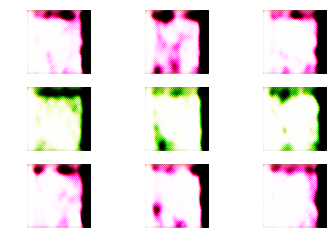

  Epoch: 2, Generator Loss: 2.3377428299341445, Discriminator Loss: [0.33763742 0.        ]


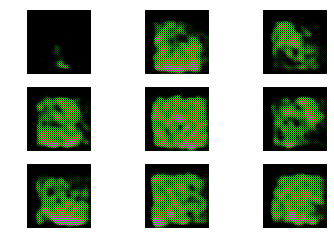

  Epoch: 3, Generator Loss: 2.064491109206126, Discriminator Loss: [0.37103128 0.        ]


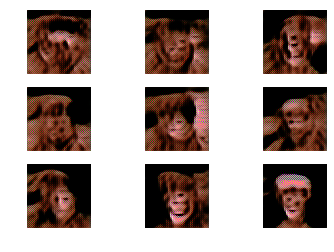

  Epoch: 4, Generator Loss: 2.169101574864143, Discriminator Loss: [0.34205654 0.        ]


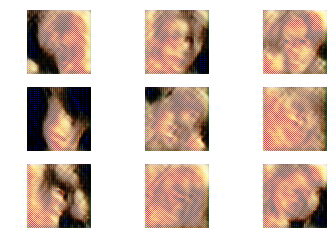

  Epoch: 5, Generator Loss: 2.381957879433265, Discriminator Loss: [0.322037 0.      ]


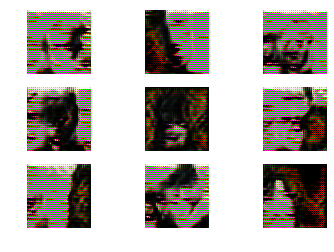

  Epoch: 6, Generator Loss: 2.3797205701852455, Discriminator Loss: [0.31968927 0.        ]


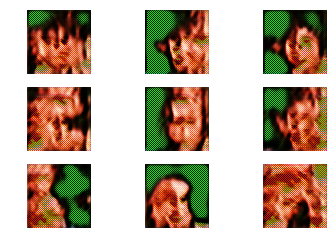

  Epoch: 7, Generator Loss: 2.3842986860336404, Discriminator Loss: [0.3248859 0.       ]


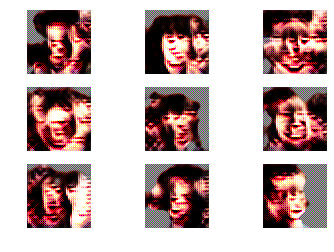

  Epoch: 8, Generator Loss: 2.3436044576840525, Discriminator Loss: [0.34733945 0.        ]


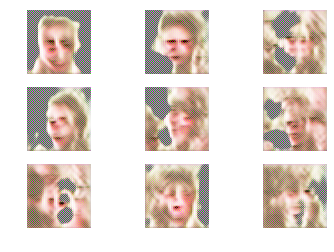

In [ ]:
N_EPOCHS = 60
for epoch in range(N_EPOCHS):

  cum_d_loss = 0.
  cum_g_loss = 0.
  
  for batch_idx in range(num_batches):
    # Get the next set of real images to be used in this iteration
    images = X_train[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

    noise_data = generate_noise(BATCH_SIZE, 100)
    generated_images = generator.predict(noise_data)

    # Train on soft labels (add noise to labels as well)
    noise_prop = 0.05 # Randomly flip 5% of labels
    
    # Prepare labels for real data
    true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
    true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
    
    # Train discriminator on real data
    d_loss_true = discriminator.train_on_batch(images, true_labels)

    # Prepare labels for generated data
    gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
    gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]
    
    # Train discriminator on generated data
    d_loss_gene = discriminator.train_on_batch(generated_images, gene_labels)

    d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
    cum_d_loss += d_loss
    # Train generator
    noise_data = generate_noise(BATCH_SIZE, 100)
    g_loss = gan.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
    cum_g_loss += g_loss

  print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
  show_imgs("epoch" + str(epoch))